In [105]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [85]:
x_train.shape

(60000, 28, 28)

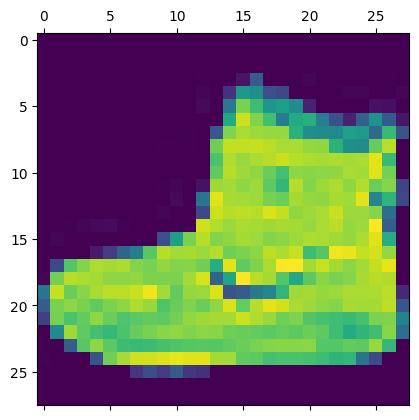

In [86]:
def get_image(index,dataset):
    x = {
        'train': x_train,
        'test': x_test
    }
    import matplotlib.pyplot as plt
    return plt.matshow(x[dataset][index])

get_image(0,'train')

In [87]:
def get_image_category(index):
    img_category = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    return img_category[y_train[index]]

get_image_category(0)


'Ankle boot'

In [88]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

print("Shape of x-train : ",x_train.shape,end='\n')
print("Shape of y-train-categorical : ",y_train_cat.shape,end='\n')

Shape of x-train :  (60000, 28, 28)
Shape of y-train-categorical :  (60000, 10)


In [89]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        layers.Dense(400,activation='relu'),
        layers.Dense(200,activation='relu'),
        layers.Dense(100,activation='relu'),
        layers.Dense(50,activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

C:\Users\Rogul\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,860 (1.60 MB)

 Trainable params: 419,860 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.fit(x_train,y_train_cat,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7799 - loss: 1.1173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8347 - loss: 0.4635
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8464 - loss: 0.4242
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8557 - loss: 0.3996
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8676 - loss: 0.3699


In [91]:
model.evaluate(x_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8515 - loss: 0.4175


[0.4175313115119934, 0.8514999747276306]

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [111]:
y_pred_classes = np.argmax(y_pred[:],axis=1) # argmax -> max value index
category_predictor=np.vectorize(get_image_category)

In [115]:
test_category = pd.DataFrame(category_predictor(y_test))
print("Test Data Category")
test_category

Test Data Category


,0
0,Sandal
1,T-shirt/top
2,T-shirt/top
3,T-shirt/top
4,Sneaker
...,...
9995,Sandal
9996,T-shirt/top
9997,Sandal
9998,T-shirt/top


In [114]:

predicted_category=pd.DataFrame(category_predictor(y_pred_classes))
print("Predicted Data Category")
predicted_category

Predicted Data Category


,0
0,Sandal
1,T-shirt/top
2,T-shirt/top
3,T-shirt/top
4,Ankle boot
...,...
9995,Sandal
9996,T-shirt/top
9997,Sandal
9998,T-shirt/top


In [140]:
def get_wrong_predictions(true,pred):
    if true != pred:
        return [true, pred]
    else:
        return [None,None]          

predict_wrong = np.vectorize(get_wrong_predictions)
wrong_predictions=predict_wrong(predicted_category,test_category)

wrong_predictions = pd.DataFrame(wrong_predictions)
wrong_predictions


,0
0,"[None, None]"
1,"[None, None]"
2,"[None, None]"
3,"[None, None]"
4,"[Ankle boot, Sneaker]"
...,...
9995,"[None, None]"
9996,"[None, None]"
9997,"[None, None]"
9998,"[None, None]"


In [ ]:
li=np.array(wrong_predictions.iloc[0]).reshape(-1,-1)
li[0]

array([list([None, None])], dtype=object)